# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. Because of this, we need to adjust our features, so they all fit on the same scale, but maintain the relationship between data points in each feature.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# create a variable called scaler which we will use to scale our large-range features
scaler = StandardScaler()

In [6]:
# Now we fit the scaler on our feature data, except for our target column
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
# Now we use the fitted scaler object to do a transformation
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df.columns

Index([u'WTT', u'PTI', u'EQW', u'SBI', u'LQE', u'QWG', u'FDJ', u'PJF', u'HQE',
       u'NXJ', u'TARGET CLASS'],
      dtype='object')

In [9]:
# create a dataframe of our scaled_features
# We set columns to df.columns, but we didn't use 'TARGET CLASS', so we use [:-1]
# df.columns[:-1] basically means grab all but the last one
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df_feat
y = df['TARGET CLASS']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Create an instance called knn and set number of neighbors to 1 to start with.
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
# Now we will fit with our training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
# And we will grab some predictions from our trained model
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


We can interpret our confusion matrix like this:

                        Actual
                   NonTarg  Target
           NonTarg | 151  |   8    | = 159 total predicted NonTarg
    Predicted
            Target | 15   |  126   | = 141 total predicted Target
                      =       =
                     166     134
                   Actual    Actual
                   NonTarg   Target
* We accurately predicted 151 that were non-targets.
* For 8 people who are targets, we falsely predicted they were non-targets.
* For 15 people who are non-targets, we falsely predicted they were targets.
* We accurately predicted 126 people are targets.

**Precision** = Total Accurately Predicted / Total Actual. <br>
    *126 Accurateley Predicted Targets / 134 Actual Targets = **0.94***
    
**Recall** = Total Accurately Predicted / Total Predicted<br>
    *126 Accurately Predicted Targets / 141 Total Predicted Targets = **0.89***
    
**F-1 Score** = 2 * ( (Precision * Recall) / (Precision + Recall) )<br>
    *2 x ( (0.94 x 0.89) / (0.94 + 0.89) ) => 2 x ( (0.837) / (1.83) )* <br>
    *=> 2 x (0.457) = **0.915***

In [19]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [20]:
# What we are actually going to do, is use a bunch of different K-Values,
# and choose the one with the lowest error rate

# Create an empty list called error_rate

error_rate = []

# Let's check every K-Value from 1 to 40
# For all K-Values, we will create an instance with each K-Value
# We will then fit the model for each K-Value
# Then we will make predictions for each K-Value
# Then we will append the average error rate where our predictions were not equal to the test value
# Error rate is the percentage you get wrong
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

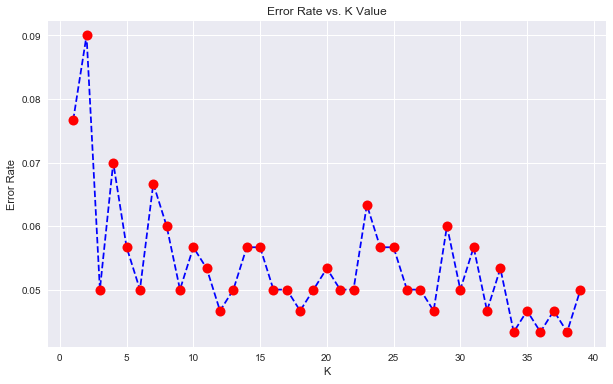

In [21]:
# Now let's plot our error rates
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [22]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[151   8]
 [ 15 126]]


             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [26]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[153   6]
 [  9 132]]


             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300



# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!